In [7]:
import stock_analysis
from stock_analysis.utils import group_stocks
import pandas as pd


amzn = pd.read_csv('data/amazon.csv', index_col='date', parse_dates=True)
aapl = pd.read_csv('data/apple.csv', index_col='date', parse_dates=True)
fb = pd.read_csv('data/facebook.csv',  index_col='date', parse_dates=True)
nflx = pd.read_csv('data/netflix.csv',  index_col='date', parse_dates=True)
goog = pd.read_csv('data/google.csv' ,index_col='date', parse_dates=True)

In [9]:
faang = group_stocks(
    {
        'Facebook': fb,
        'Apple': aapl,
        'Amazon': amzn,
        'Netflix': nflx,
        'Google': goog
    }
)

array([[<AxesSubplot:title={'center':"Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Facebook Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Facebook after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Netflix Open Price - Prior Day's Close"}, xlabel='da

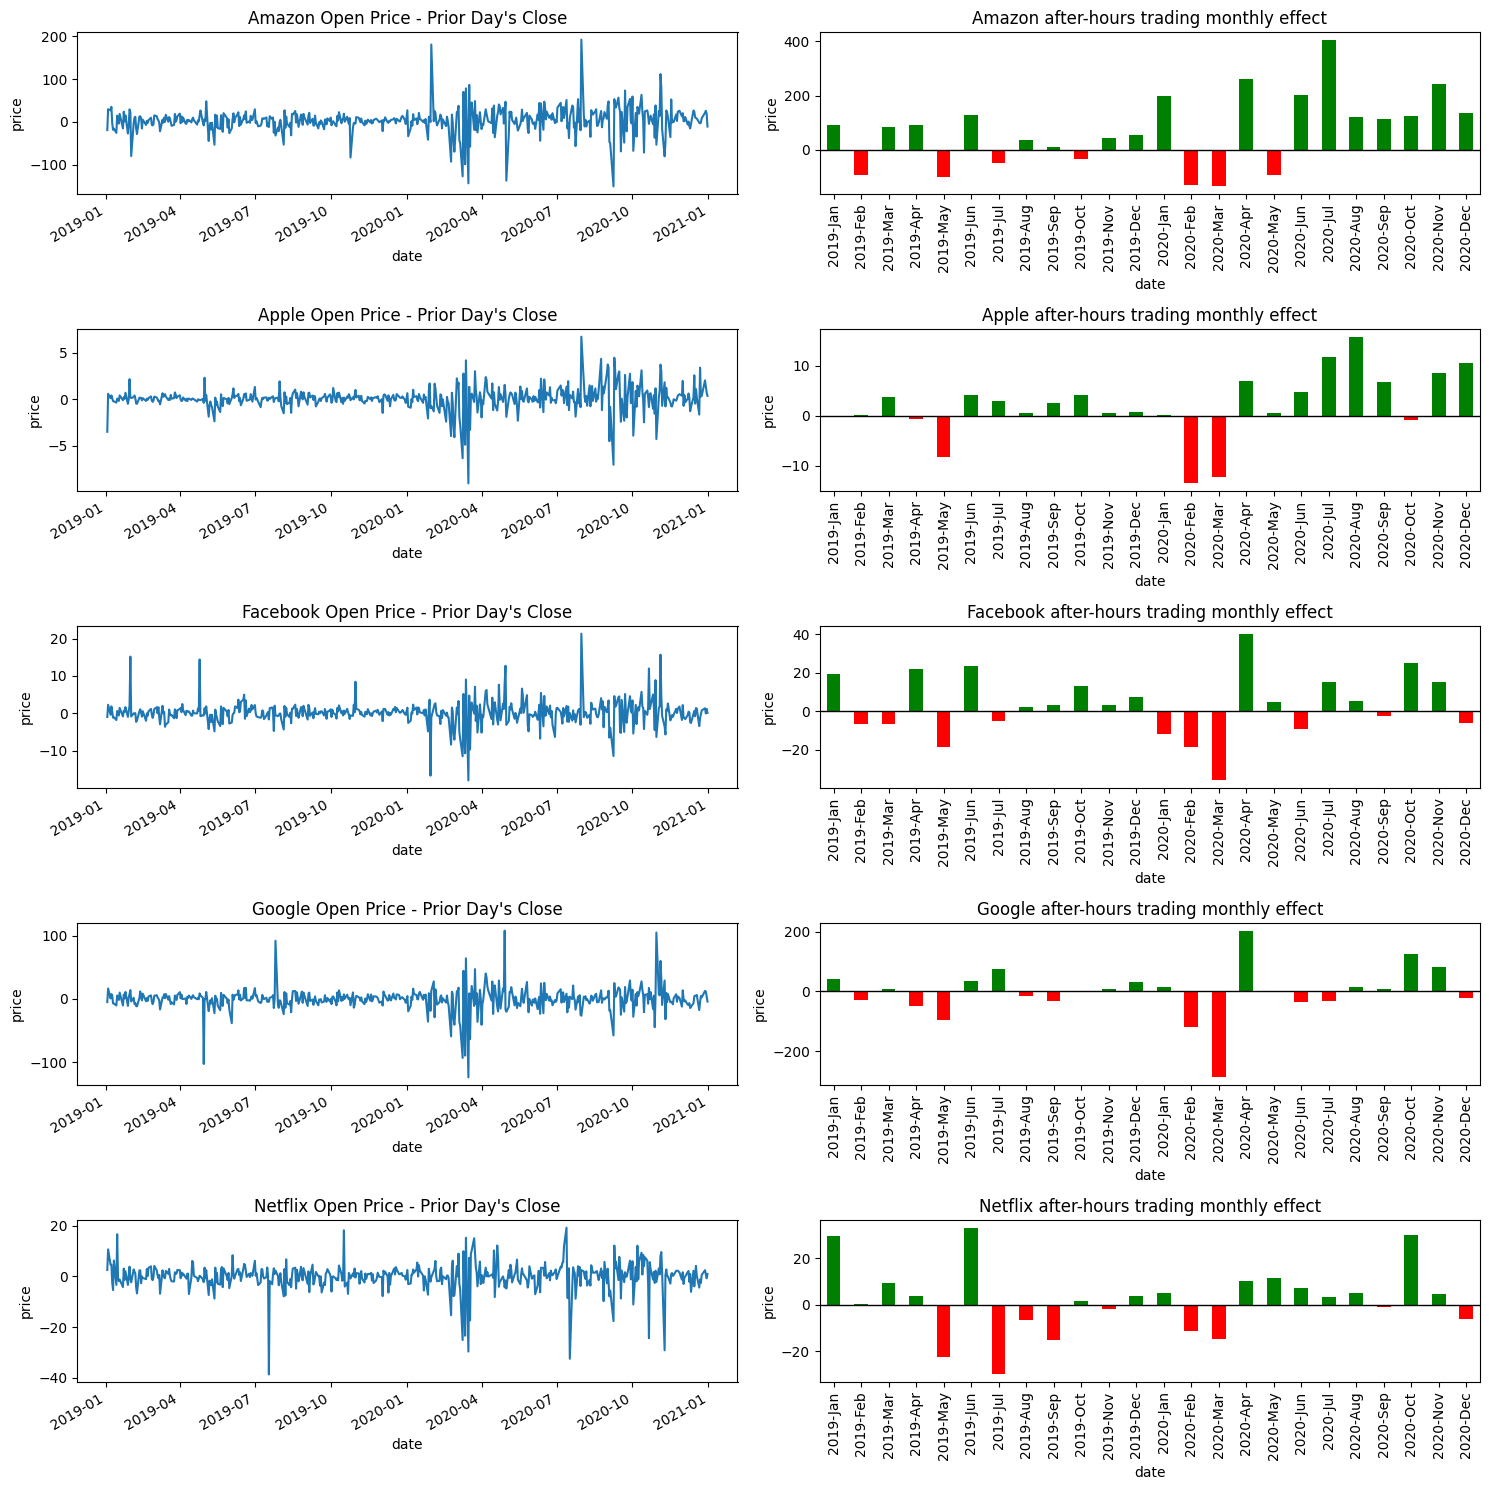

In [10]:
stock_analysis.AssetGroupVisualizer(faang).after_hours_trades()

array([<AxesSubplot:title={'center':"After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <AxesSubplot:title={'center':'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

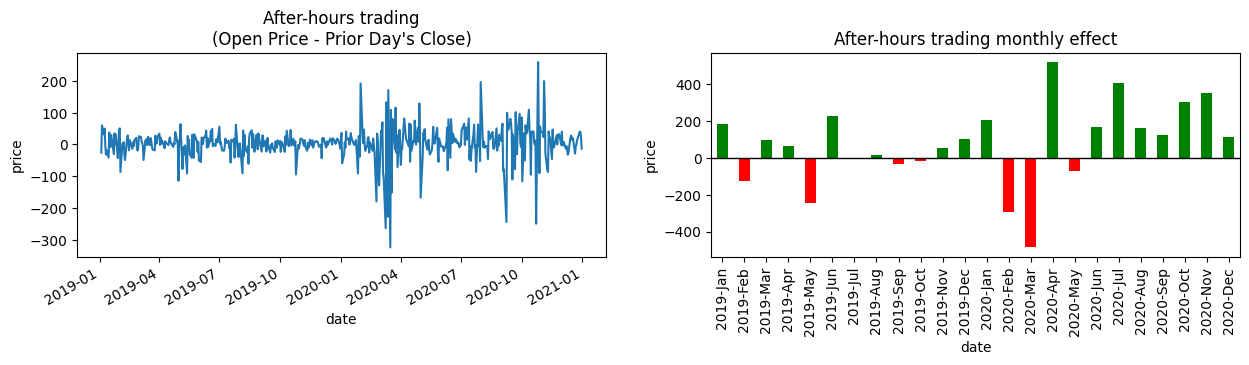

In [12]:
from stock_analysis.utils import make_portfolio

stock_analysis.StockVisualizer(make_portfolio(faang)).after_hours_trades()

<AxesSubplot:ylabel='price'>

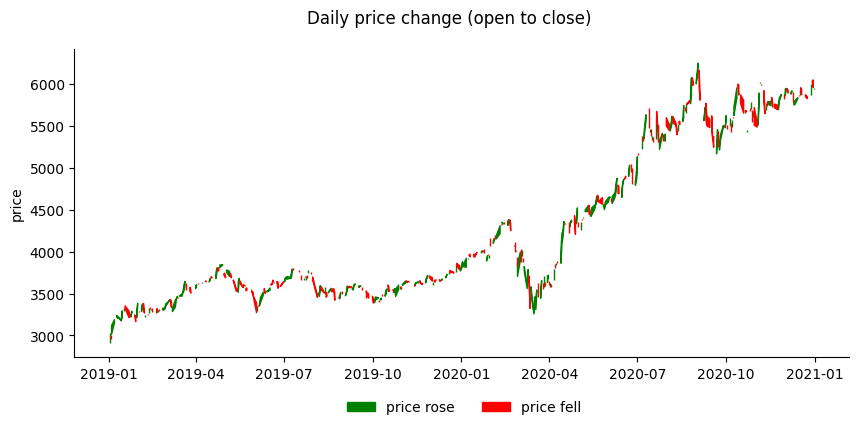

In [13]:
stock_analysis.StockVisualizer(make_portfolio(faang)).open_to_close()

In [21]:
sp = pd.read_csv('data/sp500.csv', index_col='date', parse_dates=True )

In [26]:
train = sp['2019':'2020-11']
test = sp.loc['2020-12']

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

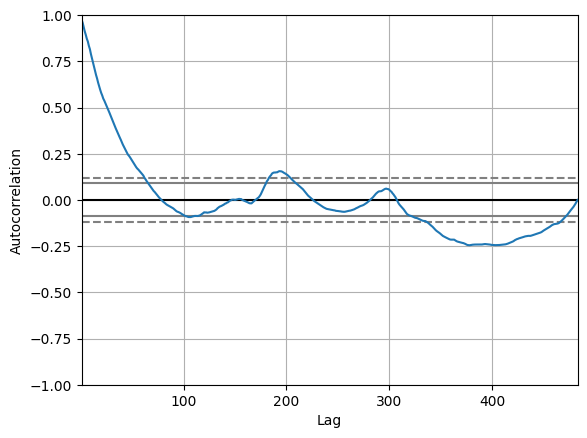

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train.close)

In [28]:
from stock_analysis import StockModeler
arima_model = StockModeler.arima(train, ar=15, i=1, ma=5)

c:\Users\marc\anaconda3\envs\book_env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([<AxesSubplot:title={'center':'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot:title={'center':'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

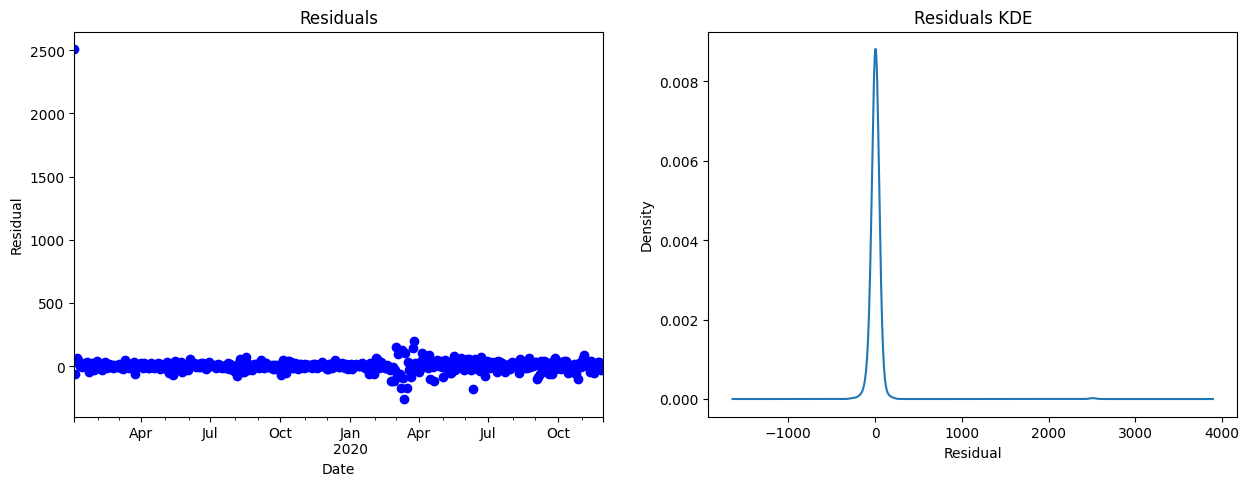

In [30]:
StockModeler.plot_residuals(arima_model)

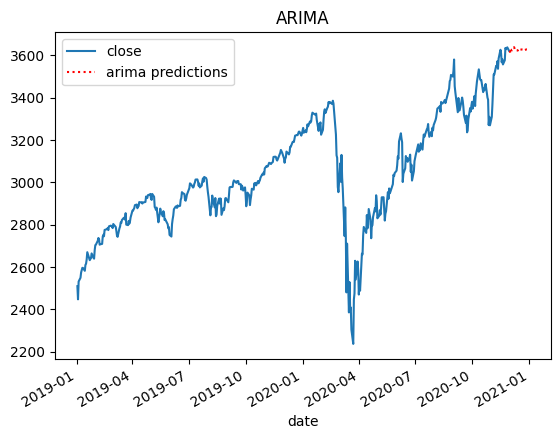

In [31]:
dates = test.index
arima_ax = StockModeler.arima_predictions(train, arima_model, start=dates[0], end=dates[-1], title='ARIMA')

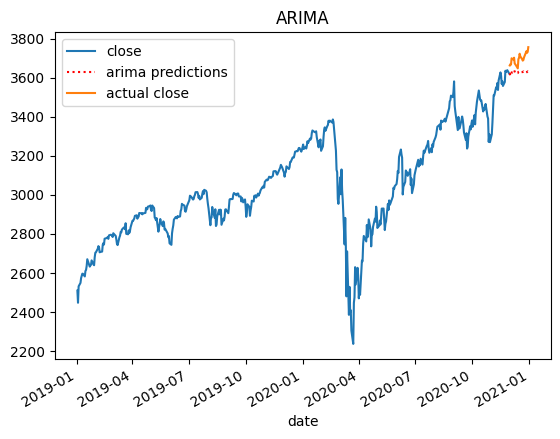

In [32]:
dates = test.index
arima_ax = StockModeler.arima_predictions(train, arima_model, start=dates[0], end=dates[-1], title='ARIMA')
test.close.plot(ax = arima_ax, label='actual close')
arima_ax.legend()